In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def single_tone(frequency, sampling_rate = 16000, duration = 1):
  t = np.linspace(0, duration, int(sampling_rate))
  y = np.sin(2* np.pi * frequency * t)
  return y

y = single_tone(400)


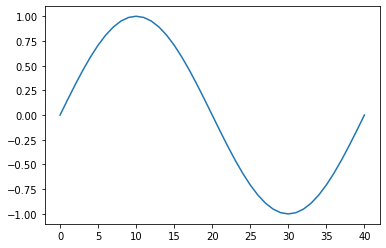

In [ ]:
plt.plot(y[:41])
plt.show()

In [2]:
import numpy as np
import tensorflow as tf
data_url = 'https://aiffelstaticdev.blob.core.windows.net/dataset/speech_wav_8000.npz'
path = tf.keras.utils.get_file('speech_wav_8000.npz', data_url)
speech_data = np.load(path)

1621262336/1621257882 [==============================] - 178s 0us/step


# 새 섹션

# 새 섹션

In [3]:
print("Wave data shape : ", speech_data["wav_vals"].shape)
print("Label data shape : ", speech_data["label_vals"].shape)

Wave data shape :  (50620, 8000)
Label data shape :  (50620, 1)


In [4]:
import IPython.display as ipd
import random
# 데이터 선택 (랜덤하게 선택하고 있으니, 여러번 실행해 보세요)
rand = random.randint(0, len(speech_data["wav_vals"]))
print("rand num : ", rand)
sr = 8000 # 1초동안 재생되는 샘플의 갯수
data = speech_data["wav_vals"][rand]
print("Wave data shape : ", data.shape)
print("label : ", speech_data["label_vals"][rand])
ipd.Audio(data, rate=sr)

rand num :  24073
Wave data shape :  (8000,)
label :  ['go']


In [5]:
target_list = ['yes', 'no', 'up','down','left', 'right', 'on','off','stop','go']

label_value = target_list
label_value.append('unknown')
label_value.append('silence')

print('LABEL : ', label_value)

new_label_value = dict()

for i, l in enumerate(label_value):
  new_label_value[l] = i
label_value = new_label_value

print('Indexed LABEL : ', new_label_value)

LABEL :  ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'unknown', 'silence']
Indexed LABEL :  {'yes': 0, 'no': 1, 'up': 2, 'down': 3, 'left': 4, 'right': 5, 'on': 6, 'off': 7, 'stop': 8, 'go': 9, 'unknown': 10, 'silence': 11}


In [6]:
temp = []
for v in speech_data['label_vals']:
  temp.append(label_value[v[0]])
label_data = np.array(temp)

label_data

array([ 3,  3,  3, ..., 11, 11, 11])

In [7]:
from sklearn.model_selection import train_test_split
sr = 8000
train_wav, test_wav, train_label, test_label = train_test_split(
    speech_data['wav_vals'],
    label_data,
    test_size = 0.1, 
    shuffle = True
)
print(train_wav)

train_wav = train_wav.reshape([-1, sr, 1]) # add channel for CNN
test_wav = test_wav.reshape([-1, sr, 1])
print('check')

[[ 3.60266119e-03  4.87325899e-03 -2.96495826e-04 ...  1.72046130e-03
   7.89884711e-04 -2.88639567e-03]
 [ 6.99889715e-05  1.13577182e-04  9.80000186e-06 ...  4.93198750e-04
   6.40915125e-04  5.08645433e-04]
 [ 2.23095133e-03  4.52050474e-04 -4.70188959e-03 ...  1.27858052e-03
   4.89679538e-03  2.46279314e-03]
 ...
 [ 3.29242204e-03  4.73610917e-03  8.03392250e-05 ...  2.58947001e-03
   2.09258590e-03 -1.84873759e-03]
 [ 6.26281137e-04 -5.51324338e-03 -8.09938647e-03 ...  1.14858840e-02
   1.30281365e-02  5.87314414e-03]
 [-1.99020127e-04 -1.35137132e-04  1.00406069e-04 ...  1.21346406e-04
   1.42212783e-04  2.38769906e-04]]
check


In [8]:
batch_size = 32
max_epochs = 10

# the save point
import os
os.mkdir('models')
checkpoint_dir = './models.wav'
checkpoint_dir

'./models.wav'

In [9]:
def one_hot_label(wav, label):
  label = tf.one_hot(label, depth=12)
  return wav, label
print('check')

check


In [10]:
import tensorflow as tf 

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_wav, train_label))
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size = batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_wav, test_label))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size = batch_size)
print(test_dataset)
print('check')

<BatchDataset shapes: ((None, 8000, 1), (None, 12)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 8000, 1), (None, 12)), types: (tf.float32, tf.float32)>
check


In [11]:
from tensorflow.keras import layers
input_tensor = layers.Input(shape = (sr, 1))

x = layers.Conv1D(32, 9, padding = 'same', activation = 'relu')(input_tensor)
x = layers.Conv1D(32, 9, padding = 'same', activation = 'relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(64, 9, padding = 'same', activation = 'relu')(x)
x = layers.Conv1D(64, 9, padding = 'same', activation = 'relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(128, 9, padding = 'same', activation = 'relu')(x)
x = layers.Conv1D(128, 9, padding = 'same', activation = 'relu')(x)
x = layers.Conv1D(128, 9, padding = 'same', activation = 'relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(256, 9, padding = 'same', activation = 'relu')(x)
x = layers.Conv1D(128, 9, padding = 'same', activation = 'relu')(x)
x = layers.Conv1D(128, 9, padding = 'same', activation = 'relu')(x)
x = layers.MaxPool1D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)
model_wav = tf.keras.Model(input_tensor, output_tensor)
model_wav.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 8000, 32)          320       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8000, 32)          9248      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4000, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4000, 64)          18496     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4000, 64)          36928     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2000, 64)          0     

In [12]:
optimizer = tf.keras.optimizers.Adam(1e-4)
model_wav.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), optimizer = optimizer, metrics = 'accuracy')
print('check')

check


In [13]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only = True,
                                                 monitor = 'val_loss',
                                                 mode = 'auto',
                                                 save_best_only = True,
                                                 verbose = 1)
print('check')

check


In [16]:
# 30분 소요
history_wav = model_wav.fit(train_dataset, epochs = max_epochs,
                            steps_per_epoch = len(train_wav) // batch_size,
                            validation_data = test_dataset,
                            validation_steps = len(test_wav) // batch_size,
                            callbacks = [cp_callback])
print('check')

Epoch 1/10
1423/1423 [==============================] - 194s 113ms/step - loss: 1.8567 - accuracy: 0.3598 - val_loss: 0.9625 - val_accuracy: 0.7017

Epoch 00001: val_loss improved from inf to 0.96246, saving model to ./models.wav
Epoch 2/10
1423/1423 [==============================] - 164s 115ms/step - loss: 0.9175 - accuracy: 0.7140 - val_loss: 0.6817 - val_accuracy: 0.7994

Epoch 00002: val_loss improved from 0.96246 to 0.68169, saving model to ./models.wav
Epoch 3/10
1423/1423 [==============================] - 164s 115ms/step - loss: 0.6536 - accuracy: 0.7987 - val_loss: 0.5512 - val_accuracy: 0.8317

Epoch 00003: val_loss improved from 0.68169 to 0.55118, saving model to ./models.wav
Epoch 4/10
1423/1423 [==============================] - 163s 115ms/step - loss: 0.4772 - accuracy: 0.8578 - val_loss: 0.4062 - val_accuracy: 0.8768

Epoch 00004: val_loss improved from 0.55118 to 0.40624, saving model to ./models.wav
Epoch 5/10
1423/1423 [==============================] - 163s 115ms/s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'lowr right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


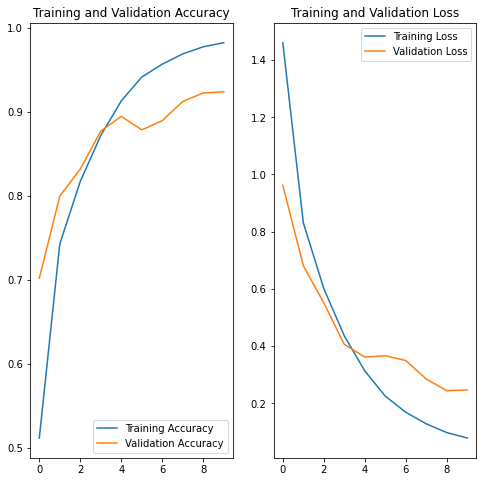

check


In [18]:
import matplotlib.pyplot as plt

acc = history_wav.history['accuracy']
val_acc = history_wav.history['val_accuracy']

loss = history_wav.history['loss']
val_loss = history_wav.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize = (8, 8))
plt.subplot(121)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lowr right')
plt.title('Training and Validation Accuracy')

plt.subplot(122)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()
print('check')

In [19]:
model_wav.load_weights(checkpoint_dir)
print('check')

check


In [20]:
results = model_wav.evaluate(test_dataset)
print('check')

159/159 [==============================] - 6s 34ms/step - loss: 0.2440 - accuracy: 0.9224
check


In [21]:
# loss
print('loss value : {:.3f}'.format(results[0]))
# accuracy
print('accuracy value : {:.4f}%'.format(results[1]*100))
print('check')

loss value : 0.244
accuracy value : 92.2363%
check


In [22]:
inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size = 1, replace = False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav(batch_xs, training=False)

print('label : ', str(inv_label_value[batch_ys[0]]))
ipd.Audio(batch_xs.reshape(8000, ), rate = 8000)

label :  no


In [23]:
if np.argmax(y_pred_) == batch_ys[0]:
  print('y_pred: '+ str(inv_label_value[np.argmax(y_pred_)]) + '(Correct!)')
else:
  print('y_pred: '+ str(inv_label_value[np.argmax(y_pred_)]) + '(Incorrect!)')
print('check')

y_pred: no(Correct!)
check


In [24]:
input_tensor = layers.Input(shape=(sr, 1))
x = layers.Conv1D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv1D(32, 9, padding='same', activation='relu')(x)
skip_1 = layers.MaxPool1D()(x)
x = layers.Conv1D(64, 9, padding='same', activation='relu')(skip_1)
x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_1], -1)
skip_2 = layers.MaxPool1D()(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(skip_2)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_2], -1)
skip_3 = layers.MaxPool1D()(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(skip_3)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_3], -1)
x = layers.MaxPool1D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
output_tensor = layers.Dense(12)(x)
model_wav_skip = tf.keras.Model(input_tensor, output_tensor)
model_wav_skip.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 8000, 32)     320         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 8000, 32)     9248        conv1d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 4000, 32)     0           conv1d_11[0][0]                  
____________________________________________________________________________________________

In [25]:
optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav_skip.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),

optimizer=optimizer,
metrics=['accuracy'])

print("check")

check


In [26]:
# the save point
checkpoint_dir = os.getenv('HOME')+'/aiffel/speech_recognition/models/wav_skip'
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,save_weights_only=True,
monitor='val_loss',
mode='auto',
save_best_only=True,
verbose=1)

print("check")

check


In [27]:
#30분 내외 소요
history_wav_skip = model_wav_skip.fit(train_dataset, epochs=max_epochs,
steps_per_epoch=len(train_wav) // batch_size,
validation_data=test_dataset,
validation_steps=len(test_wav) // batch_size,
callbacks=[cp_callback]
)
print("check")

Epoch 1/10
1423/1423 [==============================] - 243s 170ms/step - loss: 1.6261 - accuracy: 0.4606 - val_loss: 0.7820 - val_accuracy: 0.7676

Epoch 00001: val_loss improved from inf to 0.78200, saving model to /root/aiffel/speech_recognition/models/wav_skip
Epoch 2/10
1423/1423 [==============================] - 245s 172ms/step - loss: 0.7369 - accuracy: 0.7783 - val_loss: 0.5171 - val_accuracy: 0.8509

Epoch 00002: val_loss improved from 0.78200 to 0.51705, saving model to /root/aiffel/speech_recognition/models/wav_skip
Epoch 3/10
1423/1423 [==============================] - 243s 171ms/step - loss: 0.4132 - accuracy: 0.8853 - val_loss: 0.4000 - val_accuracy: 0.8831

Epoch 00003: val_loss improved from 0.51705 to 0.40003, saving model to /root/aiffel/speech_recognition/models/wav_skip
Epoch 4/10
1423/1423 [==============================] - 241s 169ms/step - loss: 0.2106 - accuracy: 0.9498 - val_loss: 0.2880 - val_accuracy: 0.9118

Epoch 00004: val_loss improved from 0.40003 to 0

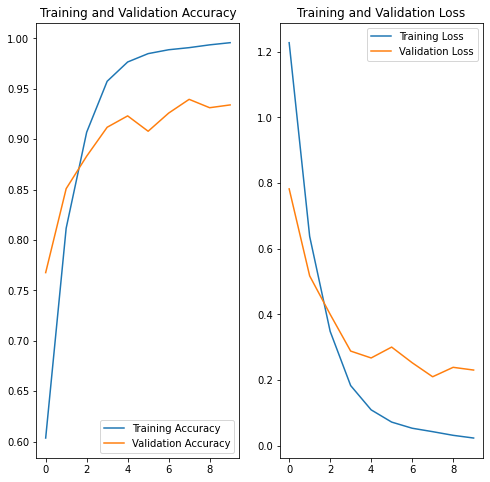

check


In [28]:
import matplotlib.pyplot as plt
acc = history_wav_skip.history['accuracy']
val_acc = history_wav_skip.history['val_accuracy']
loss=history_wav_skip.history['loss']
val_loss=history_wav_skip.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("check")

In [29]:
# Evaluation
model_wav_skip.load_weights(checkpoint_dir)
results = model_wav_skip.evaluate(test_dataset)
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))
print("check")

159/159 [==============================] - 8s 46ms/step - loss: 0.2096 - accuracy: 0.9395
loss value: 0.210
accuracy value: 93.9550%
check


In [30]:
# Test
inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size=1, replace=False)
batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav_skip(batch_xs, training=False)
print("label : ", str(inv_label_value[batch_ys[0]]))
ipd.Audio(batch_xs.reshape(8000,), rate=8000)

label :  on


In [32]:
if np.argmax(y_pred_) == batch_ys[0]:
  print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Correct!)')
else:
  print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Incorrect!)')
print("check")

y_pred: on(Correct!)
check


In [34]:
import librosa
def wav2spec(wav, fft_size=258): # spectrogram shape을 맞추기위해서 size 변형
  D = np.abs(librosa.stft(wav, n_fft=fft_size))
  return D
print("check")

check


In [35]:
# 위에서 뽑았던 sample data
spec = wav2spec(data)
print("Waveform shape : ",data.shape)
print("Spectrogram shape : ",spec.shape)

Waveform shape :  (8000,)
Spectrogram shape :  (130, 126)


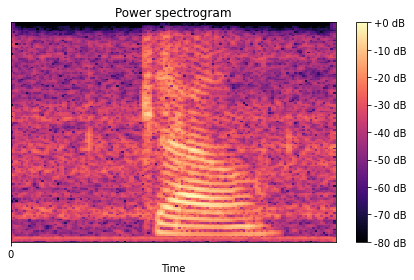

In [36]:
import librosa.display
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()

In [37]:
del speech_data
del spec_data

NameError: ignored